<a href="https://colab.research.google.com/github/sayakpaul/PAWS-TF/blob/main/colabs/visualization_paws_projections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sayakpaul/PAWS-TF

Cloning into 'PAWS-TF'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (279/279), done.
remote: Compressing objects: 100% (205/205), done.
remote: Total 279 (delta 175), reused 158 (delta 68), pack-reused 0
Receiving objects: 100% (279/279), 26.37 MiB | 36.48 MiB/s, done.
Resolving deltas: 100% (175/175), done.


In [3]:
!wget -q https://github.com/sayakpaul/PAWS-TF/releases/download/v1.0.0/model_files.zip
!unzip -qq model_files.zip

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np

In [2]:
# Constants
AUTO = tf.data.AUTOTUNE

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Prepare Dataset object for the test set
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_ds = test_ds.map(
    lambda x, y: (tf.image.central_crop(x, 0.5), y), num_parallel_calls=AUTO
).batch(256)

In [3]:
# Load the fine-tuned model
wide_resnet_enc = tf.keras.models.load_model("paws_finetuned")

# Make predictions
projections = wide_resnet_enc.predict(test_ds)

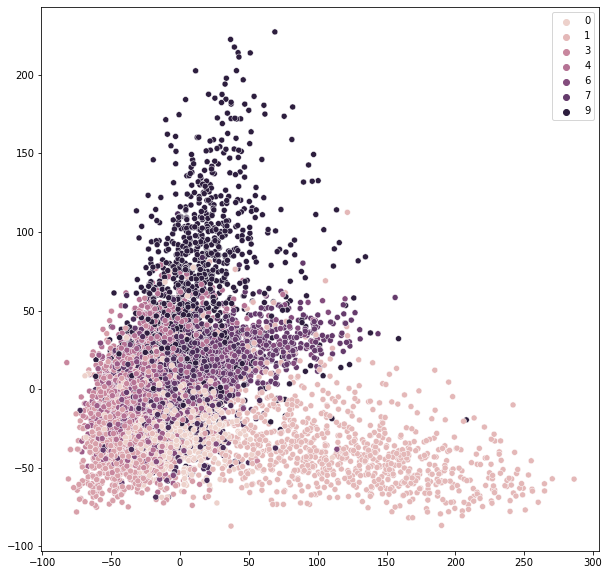

In [5]:
test_labels = []
for _, batch_labels in test_ds:
    test_labels.append(batch_labels)
test_labels = tf.concat(test_labels, axis=0)

tl = PCA()
embedding = tl.fit_transform(projections[1])
fig = plt.figure(figsize = (10, 10))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=test_labels.numpy().squeeze())
fig.savefig("projections_viz.png", dpi=300, bbox_inches="tight")